# Vasu

In [1]:
import os
from PIL import Image
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [2]:
path = "."

###From: https://towardsdatascience.com/label-your-images-easily-using-this-jupyter-notebook-code-4102037b7821



labels = []
path = path + '/'
val_for = ['jpg', 'jpeg', 'png']
valid_img_list = os.listdir(path)
valid_img_list = [i for i in valid_img_list if i.split('.')[-1] in val_for]

print("Total File:", len(valid_img_list))

Total File: 2500


Image # 2499


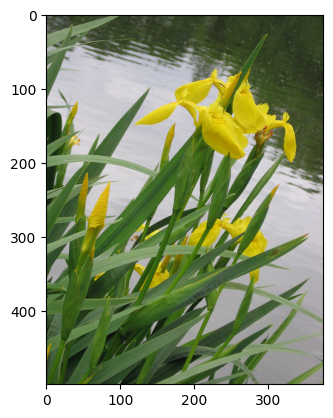

1


In [5]:
start = 1120
pre_save = start
labels = []
batch_size = 20
img_list = valid_img_list[start:]

for idx, i in zip(range(len(img_list)),img_list):
    print("Image #", start+idx)
    im = Image.open(path + i)
    plt.imshow(im)
    plt.show()
    inp = input()
    labels.append(int(inp))
    clear_output(wait=True)
    
    if(idx>0 and idx%batch_size==0):
        print(pre_save, pre_save+len(labels), len(labels), len(img_list))
        data = {'Image':valid_img_list[pre_save:pre_save+len(labels)], 'Label':labels}
        print(data)
        df = pd.DataFrame(data)
        df.to_csv(f"{path}/labels-{pre_save//batch_size}.csv") 
        print("Saved output #", pre_save//batch_size)
        labels = []
        pre_save = start+idx+1

if pre_save<(start+idx+1):
    data = {'Image':valid_img_list[pre_save:pre_save+len(labels)], 'Label':labels}
    df = pd.DataFrame(data)
    df.to_csv(f"{path}/labels-last.csv") 



# import glob
glob.glob('./*.csv')

# For each image, input a number for whether the image is indoors/outdoors
## 0 = indoors
## 1 = outdoor day
## 2 = outdoor night